# Gathering Data

In [16]:
import pandas as pd
import numpy as np

import requests
import os

import tweepy
import timeit
import json

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Gathering info from a local csv file

In [17]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv') 
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Gathering the tweet image prediction from a URL

In [18]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [19]:
df_image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
df_image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Retrieving data from the Twitter API

In [20]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,
                parser=tweepy.parsers.JSONParser(),
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

https://stackoverflow.com/questions/24002536/get-tweepy-search-results-as-json

In [21]:
start = timeit.timeit()

tweet_list = []
rank = 0
tweet_list_errors = []

for tweet_id in df_twitter_archive.tweet_id:
    try:
        rank = rank + 1
        print(rank)
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_list.append(tweet)
        
    except Exception as e:
        print(str(rank) + "_" + str(tweet_id) + ": " + str(e))
        tweet_list_errors.append(tweet_id)

end = timeit.timeit()
print(end - start)    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
20_888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
96_873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
97
98
99
100
101
102
102_872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
103
104
105
105_872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
106
107
108
109
110
111
112
113
114
115
116
117
118
119
119_869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
120
121
122
123
124
125
126
127
128
129
130
131
132
133
133_866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
15

1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646


In [22]:
print("Total JSON tweets correctly download: ", len(tweet_list))
print("Total JSON tweets incorrectly download: ", len(tweet_list_errors))

Total JSON tweets correctly download:  2331
Total JSON tweets incorrectly download:  25


https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

In [23]:
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_list, indent = 4))

In [24]:
tweets_info = []

with open('tweet_json.txt', encoding='utf-8') as json_file:
    data = json.load(json_file)
    for tweet in data:
        tweet_id = tweet['id']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweets_info.append({'tweet_id': tweet_id,
                               'favorite_count': favorite_count,
                               'retweet_count': retweet_count})
        
df_tweets_api = pd.DataFrame(tweets_info, columns = ['tweet_id',
                                                             'favorite_count',
                                                             'retweet_count'])
df_tweets_api.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35089,7386
1,892177421306343426,30375,5499
2,891815181378084864,22840,3635


# Assessing Data

### Twitter archive enchanced

In [25]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [26]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

>The type of source and the source's url are in the same column.

In [27]:
df_twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
Daisy            7
Buddy            7
Toby             7
an               7
Bailey           7
Leo              6
Scout            6
Rusty            6
Koda             6
Jax              6
Bella            6
Milo             6
Jack             6
Dave             6
Stanley          6
Oscar            6
Sammy            5
              ... 
Billl            1
Kathmandu        1
Fwed             1
Shakespeare      1
Harlso           1
Jaspers          1
Napolean         1
Rover            1
William          1
Kloey            1
Rupert           1
Dixie            1
Tater            1
Zooey            1
Rolf             1
Todo             1
Zara             1
Dobby            1
Obi              1
Hazel            1
Combo            1
by          

>Name 'a' is not a valid name. Could be better to change all the one letter names 'None'.

In [28]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>Incorrect data type format for 'timestamp'.

>All the not null entries of 'retweeted_status_id' are retweets and we are only interested in the original ratings.

>'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns are almost compose with missing values.

>'tweet_id' data type is integer and it´s better this way and not as string because of size and speed. (https://stackoverflow.com/questions/932102/what-data-type-is-recommended-for-id-columns)

>Columns 'doggo', 'floofer', 'pupper' and 'puppo' should be only 1 variable.

In [29]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Image predictions

In [30]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
df_image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [32]:
df_image_predictions.jpg_url.duplicated().sum()

66

>66 jpg_url are duplicated.

In [33]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [35]:
df_image_predictions.p1_conf.mean()

0.59454826361445778

In [36]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [37]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
malinois                           20
toy_terrier                        20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [38]:
df_image_predictions.p2_conf.mean()

0.13458860950039181

In [39]:
df_image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [41]:
df_image_predictions.p3_conf.mean()

0.060324168618106515

In [42]:
df_image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

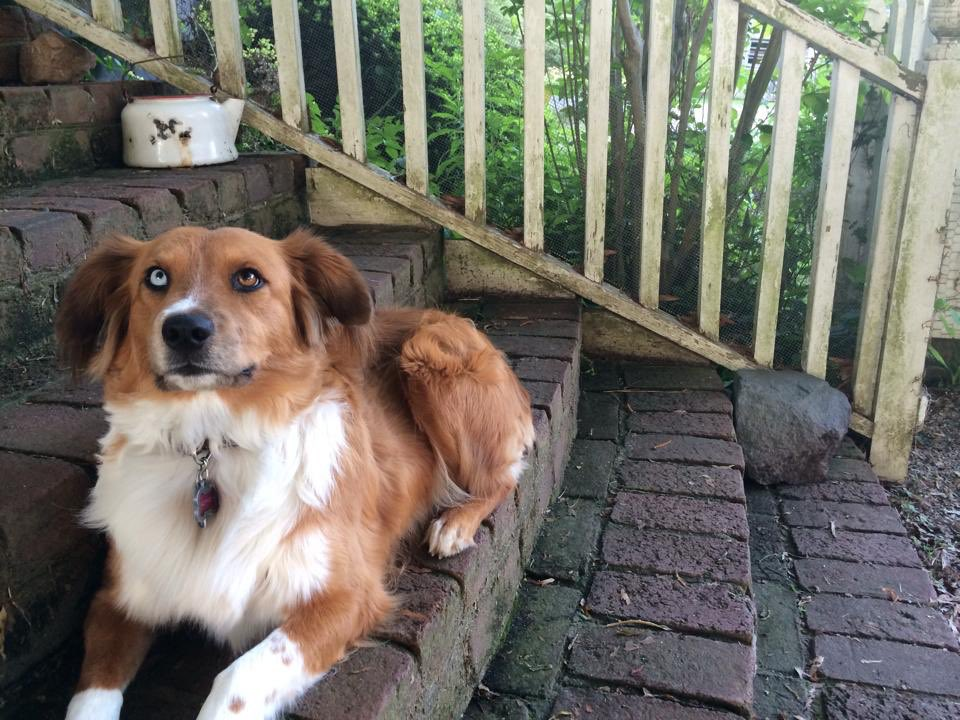

In [43]:
Image(df_image_predictions.jpg_url[0])

In [44]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>All data types are correct.

In [45]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Tweet json

In [46]:
df_tweets_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35089,7386
1,892177421306343426,30375,5499
2,891815181378084864,22840,3635
3,891689557279858688,38365,7560
4,891327558926688256,36641,8145


In [47]:
df_tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [48]:
df_tweets_api.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7328.137280,2595.832690
std,6.823170e+16,11380.589742,4391.259802
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1272.500000,527.000000
50%,7.182469e+17,3183.000000,1211.000000
75%,7.986692e+17,8957.500000,3009.000000
max,8.924206e+17,150909.000000,74514.000000


### General observation

In [49]:
all_columns = pd.Series(list(df_twitter_archive) + list(df_image_predictions) + list(df_tweets_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

>'tweet_id' is repeated in all 3 tables.

### Quality
##### `twitter_archive_enchanced` table
- Incorrect data type format for 'timestamp'.
- All the not null entries of 'retweeted_status_id' are retweets and must be deleted.
- 'in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns are almost compose with missing values so they lack of importance.
- Name 'a' is not a valid name. Could be better to change all the one letter names 'None'.
- The type of source and the source's url are in the same column.
- Correct the data type of rating_numerator and rating_denominator to admit decimals
- Create a new column that contains the obtained rating for each tweet.

##### `image_predictions` table
- 66 jpg_url are duplicated.

### Tidiness
- The tweet_id column is repeated in all 3 tables, so it should be only one table
- Columns 'doggo', 'floofer', 'pupper' and 'puppo' from the twitter enchanced table should be only 1 variable.

# Clean
First, a copy of each table is made to do the cleaning.

In [50]:
df_twitter_archive_clean = df_twitter_archive.copy()

In [51]:
df_image_predictions_clean = df_image_predictions.copy()

In [52]:
df_tweets_api_clean = df_tweets_api.copy()

## Tidiness

#### - Merge three tables in one

### Define

Merge 3 tables on 'tweet_id'

### Code

In [53]:
merged_df = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, how = 'left', on="tweet_id")

#NaN jpg_url´s are dropped
merged_df.dropna(subset=['jpg_url'], inplace=True)

df_master_clean = pd.merge(merged_df, df_tweets_api_clean, how = 'left', on="tweet_id")

df_master_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35089.0,7386.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30375.0,5499.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22840.0,3635.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38365.0,7560.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36641.0,8145.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,18476.0,2731.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,10744.0,1766.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,59075.0,16526.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,25422.0,3783.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29006.0,6404.0


### Test

In [54]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

- Columns 'doggo', 'floofer', 'pupper' and 'puppo' from the twitter enchanced table should be only 1 variable.

### Define

Use the melt function to make one column from the values that were distributed into the 'doggo', 'floofer', 'pupper' and 'puppo' columns, then drop the duplicates based in its tweet_id and keep only the last one after using sort_values by dog_type. 

### Code

In [55]:
df_master_clean = pd.melt(df_master_clean, id_vars=['tweet_id','in_reply_to_status_id', 
                                  'in_reply_to_user_id','timestamp','source',
                                  'text','retweeted_status_id','retweeted_status_user_id',
                                  'retweeted_status_timestamp','expanded_urls',
                                  'rating_numerator','rating_denominator','name','jpg_url',
                                  'img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog',
                                  'p3','p3_conf','p3_dog','favorite_count','retweet_count'],
                                   var_name='dog',
                                   value_name='dog_type').drop('dog', 1).sort_values(['dog_type'])

df_master_clean = df_master_clean.sort_values(['dog_type']).drop_duplicates(subset=['tweet_id'], keep='last')

### Test

In [56]:
df_master_clean.dog_type.value_counts()

None       1754
pupper      222
doggo        67
puppo        24
floofer       8
Name: dog_type, dtype: int64

##### `twitter_archive_enchanced` table

- Incorrect data type for 'timestamp' 

### Define

Use the pandas function to_datetime to change the data type to the correct date type.

### Code

In [57]:
df_master_clean.timestamp = pd.to_datetime(df_master_clean.timestamp, format = "%Y-%m-%d %H:%M:%S")

https://stackoverflow.com/questions/36848514/how-to-define-format-when-using-pandas-to-datetime

### Test

In [58]:
df_master_clean.timestamp.head()

4896   2016-07-25 02:20:45
4884   2016-07-28 19:06:01
4885   2016-07-28 01:31:38
4886   2016-07-28 01:00:57
4887   2016-07-27 20:56:24
Name: timestamp, dtype: datetime64[ns]

In [59]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 4896 to 6980
Data columns (total 27 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                

#### - 66 duplicated jpg_url

### Define

Use drop_duplicates to drop the duplicated images.

### Code

In [60]:
df_master_clean.jpg_url.duplicated().sum()

66

In [61]:
df_master_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

### Test

In [62]:
df_master_clean.jpg_url.duplicated().sum()

0

#### - All the not null entries of 'retweeted_status_id' are retweets and have to be deleted.

### Define

Delete all the instances with a no null value of 'retweeted_status_id' using numpy´s isnan() function.

### Code

In [63]:
df_master_clean = df_master_clean[np.isnan(df_master_clean.retweeted_status_id)]

### Test

In [64]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 4896 to 6980
Data columns (total 27 columns):
tweet_id                      1976 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1976 non-null datetime64[ns]
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1976 non-null object
rating_numerator              1976 non-null int64
rating_denominator            1976 non-null int64
name                          1976 non-null object
jpg_url                       1976 non-null object
img_num                       1976 non-null float64
p1                            1976 non-null object
p1_conf                       1976 non-null float64
p1_dog                   

#### - Remove useless columns

### Define

Use the drop function to remove useless columns.

### Code

In [65]:
df_master_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                      'retweeted_status_id','retweeted_status_user_id',
                      'retweeted_status_timestamp'], axis=1, inplace= True)

### Test

In [66]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 4896 to 6980
Data columns (total 22 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null int64
rating_denominator    1976 non-null int64
name                  1976 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null float64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null object
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null object
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null object
favorite_count        1969 non-null float64
retweet_count       

#### - Invalid names issue

### Define

Use the replace function to set all names with one letter to 'None'

### Code

In [67]:
df_master_clean.name = df_master_clean.name.str.replace('^[a-z]+', 'None')

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

### Test

In [68]:
df_master_clean.name.value_counts()

None         643
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Toby           7
Lola           7
Bella          6
Stanley        6
Koda           6
Jax            6
Louis          5
Dave           5
Buddy          5
Rusty          5
Leo            5
Bailey         5
Chester        5
Oscar          5
Sophie         4
Larry          4
George         4
Phil           4
Bentley        4
Maggie         4
            ... 
Colin          1
Laika          1
Rodney         1
Laela          1
Hazel          1
Tater          1
Dixie          1
Rupert         1
Wesley         1
Jangle         1
Chompsky       1
Lili           1
Flash          1
Willow         1
Julius         1
Timber         1
Alejandro      1
Tuco           1
Odin           1
Kloey          1
Bodie          1
Stephanus      1
Sky            1
Angel          1
Halo           1
Nugget         1
Bruno          1
Gerbald       

#### - The type of source and the source's url are in the same column.

### Define

Design a function that, with the help of the index of specific characters, will pull apart the source´s url and source´s type from each string of the 'source' column, add them as two new columns and drop the original.

### Code

In [69]:
df_master_clean.source.values[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [70]:
def pull_apart(db):
    first_column = []
    second_column = []
    
    for tag in db.values:
        html_index1 = tag.index('"')
        temp_string1 = tag[html_index1+1:]
        first_column.append(temp_string1[0:temp_string1.index('"')])
    
        html_index2 = tag.index('>')
        temp_string2 = tag[html_index2+1:]
        second_column.append(temp_string2[0:temp_string2.index('<')])
        data = {"source_url": first_column, "source_type": second_column}
        data = pd.DataFrame(data)
        
    return data

In [71]:
pull_apart(df_master_clean.source)["source_url"].values

array(['http://twitter.com/download/iphone',
       'http://twitter.com/download/iphone',
       'http://twitter.com/download/iphone', ...,
       'http://twitter.com/download/iphone',
       'http://twitter.com/download/iphone',
       'http://twitter.com/download/iphone'], dtype=object)

In [72]:
df_master_clean["source_url"] = pull_apart(df_master_clean.source)["source_url"].values
df_master_clean["source_type"] = pull_apart(df_master_clean.source)["source_type"].values
df_master_clean.drop(['source'], axis=1, inplace=True)

### Test

In [73]:
df_master_clean.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,source_url,source_type
4896,757400162377592832,2016-07-25 02:20:45,She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13,10,None,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1.0,seat_belt,...,0.087800,True,Tibetan_mastiff,0.075127,True,14732.0,6618.0,None,http://twitter.com/download/iphone,Twitter for iPhone
4884,758740312047005698,2016-07-28 19:06:01,Meet Boston. He's worried because his tongue w...,https://twitter.com/dog_rates/status/758740312...,12,10,Boston,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1.0,Chesapeake_Bay_retriever,...,0.110054,True,curly-coated_retriever,0.025201,True,5592.0,1571.0,None,http://twitter.com/download/iphone,Twitter for iPhone


#### - Correct the data type of rating_numerator and rating_denominator to admit decimals.

### Define

Use the astype function to change the data type from integer to float.

### Code

In [74]:
df_master_clean.rating_numerator = df_master_clean.rating_numerator.astype(float)
df_master_clean.rating_denominator = df_master_clean.rating_denominator.astype(float)

### Test

In [75]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 4896 to 6980
Data columns (total 23 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null float64
rating_denominator    1976 non-null float64
name                  1976 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null float64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null object
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null object
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null object
favorite_count        1969 non-null float64
retweet_count         1969 non-null float64
dog_type       

In [76]:
df_master_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,source_url,source_type
4896,757400162377592832,2016-07-25 02:20:45,She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13.0,10.0,None,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1.0,seat_belt,...,0.087800,True,Tibetan_mastiff,0.075127,True,14732.0,6618.0,None,http://twitter.com/download/iphone,Twitter for iPhone
4884,758740312047005698,2016-07-28 19:06:01,Meet Boston. He's worried because his tongue w...,https://twitter.com/dog_rates/status/758740312...,12.0,10.0,Boston,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1.0,Chesapeake_Bay_retriever,...,0.110054,True,curly-coated_retriever,0.025201,True,5592.0,1571.0,None,http://twitter.com/download/iphone,Twitter for iPhone
4885,758474966123810816,2016-07-28 01:31:38,This is Brandonald. He accidentally opened the...,https://twitter.com/dog_rates/status/758474966...,11.0,10.0,Brandonald,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1.0,Pembroke,...,0.244200,True,German_shepherd,0.100429,True,3700.0,962.0,None,http://twitter.com/download/iphone,Twitter for iPhone
4886,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,...,0.113956,True,American_Staffordshire_terrier,0.099689,True,4666.0,2144.0,None,http://twitter.com/download/iphone,Twitter for iPhone
4887,758405701903519748,2016-07-27 20:56:24,This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...,10.0,10.0,Odie,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4.0,Chesapeake_Bay_retriever,...,0.092277,False,notebook,0.032727,False,5070.0,1847.0,None,http://twitter.com/download/iphone,Twitter for iPhone


#### - create a new column that contains the obteined rating for each tweet.

### Define

Devide the rating_numerator (multiplying this by 10 to obtein a "real" rating) by rating_denominator and create a new column with these values.

### Code

In [77]:
df_master_clean['rating'] = 10*df_master_clean['rating_numerator']/df_master_clean['rating_denominator']

### Test

In [78]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 4896 to 6980
Data columns (total 24 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null float64
rating_denominator    1976 non-null float64
name                  1976 non-null object
jpg_url               1976 non-null object
img_num               1976 non-null float64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog                1976 non-null object
p2                    1976 non-null object
p2_conf               1976 non-null float64
p2_dog                1976 non-null object
p3                    1976 non-null object
p3_conf               1976 non-null float64
p3_dog                1976 non-null object
favorite_count        1969 non-null float64
retweet_count         1969 non-null float64
dog_type       

In [79]:
df_master_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,source_url,source_type,rating
4896,757400162377592832,2016-07-25 02:20:45,She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13.0,10.0,None,https://pbs.twimg.com/media/CoLTbbzXYAElNM6.jpg,1.0,seat_belt,...,True,Tibetan_mastiff,0.075127,True,14732.0,6618.0,None,http://twitter.com/download/iphone,Twitter for iPhone,13.0
4884,758740312047005698,2016-07-28 19:06:01,Meet Boston. He's worried because his tongue w...,https://twitter.com/dog_rates/status/758740312...,12.0,10.0,Boston,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,1.0,Chesapeake_Bay_retriever,...,True,curly-coated_retriever,0.025201,True,5592.0,1571.0,None,http://twitter.com/download/iphone,Twitter for iPhone,12.0
4885,758474966123810816,2016-07-28 01:31:38,This is Brandonald. He accidentally opened the...,https://twitter.com/dog_rates/status/758474966...,11.0,10.0,Brandonald,https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg,1.0,Pembroke,...,True,German_shepherd,0.100429,True,3700.0,962.0,None,http://twitter.com/download/iphone,Twitter for iPhone,11.0
4886,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1.0,Labrador_retriever,...,True,American_Staffordshire_terrier,0.099689,True,4666.0,2144.0,None,http://twitter.com/download/iphone,Twitter for iPhone,11.0
4887,758405701903519748,2016-07-27 20:56:24,This is Odie. He falls asleep wherever he want...,https://twitter.com/dog_rates/status/758405701...,10.0,10.0,Odie,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4.0,Chesapeake_Bay_retriever,...,False,notebook,0.032727,False,5070.0,1847.0,None,http://twitter.com/download/iphone,Twitter for iPhone,10.0


## Storing, Analyzing, and Visualizing Data for this Project

#### Store the data to a csv file

In [80]:
df_master_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

#### Analyze & Visualize

In [81]:
df_master = pd.read_csv('twitter_archive_master.csv')

- Stadistical properties of the rating

In [82]:
df_master.rating.describe()

count    1976.000000
mean       11.687668
std        40.855461
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

- Proportions of dog_type that are not 'None'

In [83]:
df_master.dog_type.value_counts()

None       1674
pupper      210
doggo        61
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [84]:
df_master.dog_type.value_counts()[1:5]

pupper     210
doggo       61
puppo       23
floofer      8
Name: dog_type, dtype: int64

In [85]:
dt = df_master.dog_type.value_counts()[1:5]/302
dt

pupper     0.695364
doggo      0.201987
puppo      0.076159
floofer    0.026490
Name: dog_type, dtype: float64

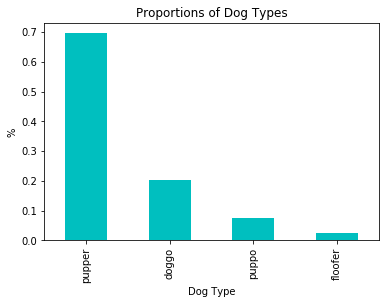

In [86]:
dt.plot(kind='bar', color='c');
plt.xlabel('Dog Type')
plt.ylabel('%')
plt.title('Proportions of Dog Types');

- Most common dog names that are not 'None'

In [87]:
df_master.name.value_counts()

None         643
Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Toby           7
Lola           7
Bella          6
Stanley        6
Koda           6
Jax            6
Louis          5
Dave           5
Buddy          5
Rusty          5
Leo            5
Bailey         5
Chester        5
Oscar          5
Sophie         4
Larry          4
George         4
Phil           4
Bentley        4
Maggie         4
            ... 
Colin          1
Laika          1
Rodney         1
Laela          1
Hazel          1
Tater          1
Dixie          1
Rupert         1
Wesley         1
Jangle         1
Chompsky       1
Lili           1
Flash          1
Willow         1
Julius         1
Timber         1
Alejandro      1
Tuco           1
Odin           1
Kloey          1
Bodie          1
Stephanus      1
Sky            1
Angel          1
Halo           1
Nugget         1
Bruno          1
Gerbald       

In [88]:
df_master.name.value_counts()[1:10]

Charlie    11
Cooper     10
Lucy       10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Name: name, dtype: int64

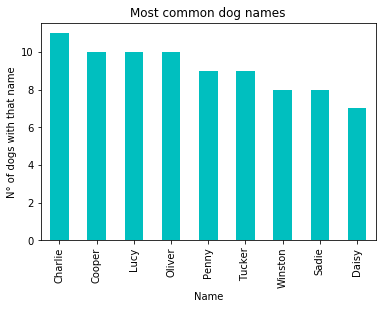

In [89]:
df_master.name.value_counts()[1:10].plot(kind='bar', color='c');
plt.xlabel('Name')
plt.ylabel('N° of dogs with that name')
plt.title('Most common dog names');

- How many tweets were tweeted by each source type

In [90]:
st = df_master.source_type.value_counts()
st

Twitter for iPhone    1937
Twitter Web Client      28
TweetDeck               11
Name: source_type, dtype: int64

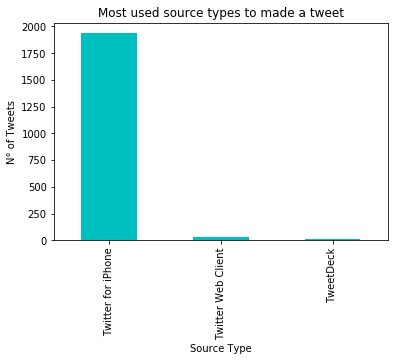

In [91]:
st.plot(kind='bar', color='c');
plt.xlabel('Source Type')
plt.ylabel('N° of Tweets')
plt.title('Most used source types to made a tweet');